In [11]:
using Plots

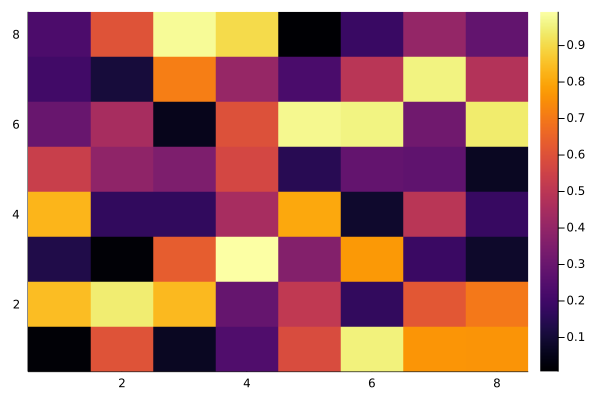

In [16]:
image = rand(8, 8)
heatmap(image)

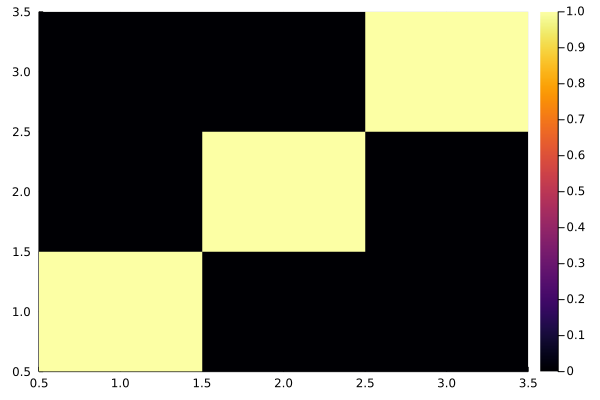

In [18]:
kernel = [1 0 0; 0 1 0; 0 0 1];
heatmap(kernel)

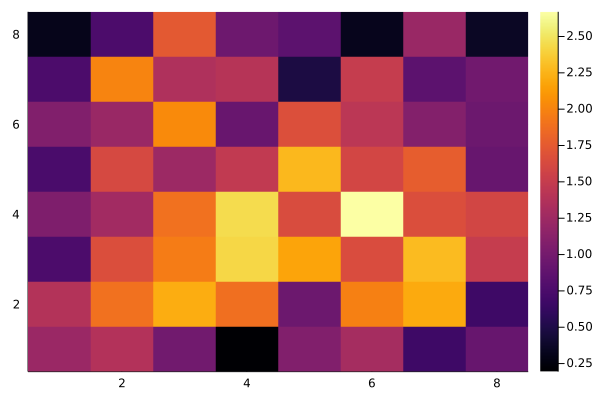

In [49]:
is = size(image)
ks = size(kernel)
padded = zeros(Float64, is .+ 2)
padded[2:is[1] + 1, 2:is[2] + 1] = image
out = zeros(Float64, is)
for i in 1:is[1]
    for j in 1:is[2]
        subimage = padded[i:i + ks[1] - 1, j:j + ks[2] - 1]
        entry = sum(subimage .* kernel)
        out[i, j] = entry
    end
end
heatmap(image)
heatmap(out)

In [57]:
kernels = rand(3, 3, 10)
out = zeros(is..., 10)
padded = zeros(Float64, is .+ 2)
padded[2:is[1] + 1, 2:is[2] + 1] = image
for kidx in 1:size(kernels)[3]
    kernel = kernels[:, :, kidx]
    for i in 1:is[1]
        for j in 1:is[2]
            subimage = padded[i:i + ks[1] - 1, j:j + ks[2] - 1]
            entry = sum(subimage .* kernel)
            out[i, j, kidx] = entry
        end
    end
end

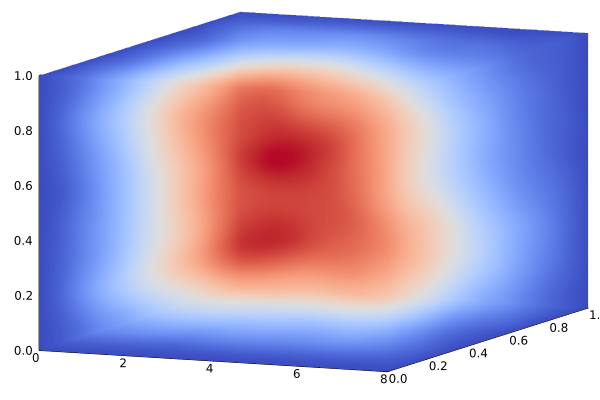

In [59]:
heatmap(out)

In [66]:
typeof(out) == {Float64}

false

In [67]:
out

8×8×10 Array{Float64, 3}:
[:, :, 1] =
 0.95663   1.64624  1.05209  0.993567  0.90184   1.3308    1.77365   0.976977
 1.10764   2.08862  1.65499  1.66938   1.65882   1.63439   1.8522    1.24169
 1.00409   1.5581   2.2078   2.2512    2.31328   2.55838   2.38236   1.55889
 0.884909  1.27225  2.07199  2.0841    2.56378   2.2946    2.41732   1.47225
 1.12878   1.56832  2.3118   2.11388   1.94137   2.29434   1.33757   1.26139
 0.876515  1.56841  1.44366  1.51968   1.17908   1.52404   1.21671   0.904577
 0.985598  1.4192   1.93129  1.23729   1.25516   0.966179  1.12353   0.336641
 0.804746  1.60155  1.65701  1.55128   0.856443  1.06448   0.723894  0.874913

[:, :, 2] =
 1.30066  1.92472  1.62808  1.41492  1.23836  1.55453   1.84014  1.30556
 1.75657  2.82778  2.87433  2.76904  2.79963  3.32993   3.65554  2.45644
 1.26024  2.55996  2.94095  3.05431  3.47087  3.32869   3.42388  2.39045
 1.48536  2.60337  3.58543  3.83336  3.89203  3.80856   3.30222  2.60115
 1.28222  2.13122  2.78497  2.80849  

In [3]:
include("layers.jl")

color (generic function with 1 method)

In [2]:
layer = Convolutional(kernel=(3, 3), filters=10, activation=sigmoid, padding=true);
image = rand(8, 8)
y = forward(image, layer);

In [3]:
flat = Flatten();
forward(y, flat)

640-element Vector{Float64}:
 0.7408007871582402
 0.7847320823998729
 0.8896428616541737
 0.8807116697258278
 0.932799089822939
 0.921840003546456
 0.9151675207109797
 0.8224119202371468
 0.8320891087264469
 0.8815110202769725
 0.8660955485414209
 0.9213974623587088
 0.9410018152729877
 ⋮
 0.9245326682586039
 0.9326943665381545
 0.9480348614917347
 0.899267925280171
 0.9322905550257867
 0.9251833267486246
 0.9202696825467584
 0.9050579027879546
 0.7729707060376994
 0.7916158441571435
 0.8627891122943663
 0.834276234569985

In [8]:
net = Network([Convolutional(kernel=(3, 3), filters=10, activation=sigmoid, padding=true),
               Flatten(),
               FullyConnected(size=(1, 640), activation=sigmoid)]);

In [10]:
image = rand(8, 8)
y = forward(image, net)
backward(1, net)

LoadError: DimensionMismatch("arrays could not be broadcast to a common size; got a dimension with lengths 640 and 8")

In [2]:
using Zygote
using Plots

In [ ]:
using Zygote
using Plots

In [27]:
function conv(x::Matrix{Float64}, W::Array{Float64, 3})
    is = size(x)
    ks = size(W)[1:2]
    filters = size(W)[3]
    out = zeros(size(x)..., filters)
    padded = zeros(Float64, size(x) .+ 2)
    padded[2:size(x)[1] + 1, 2:size(x)[2] + 1] = x
    for kidx in 1:filters
        kernel = W[:, :, kidx]
        for i in 1:is[1]
            for j in 1:is[2]
                subimage = padded[i:i + ks[1] - 1, j:j + ks[2] - 1]
                entry = sum(subimage .* kernel)
                out[i, j, kidx] = entry
            end
        end
    end
    σ = sigmoid
    s = out
    return σ(s)
end

conv (generic function with 1 method)

In [28]:
image = rand(8, 8)
W = rand(3, 3, 10)
conv(image, W)

8×8×10 Array{Float64, 3}:
[:, :, 1] =
 0.578562  0.689318  0.775861  0.764888  …  0.782039  0.732044  0.727072
 0.691386  0.80661   0.842641  0.832265     0.884615  0.799542  0.765922
 0.687558  0.822765  0.701669  0.904191     0.805345  0.708327  0.757679
 0.668993  0.733643  0.857968  0.866883     0.747306  0.811716  0.83958
 0.720778  0.863087  0.898834  0.911705     0.725276  0.847136  0.837418
 0.833959  0.880713  0.924765  0.868289  …  0.844273  0.852211  0.733045
 0.831117  0.921098  0.930514  0.891082     0.872572  0.774848  0.725236
 0.794604  0.850523  0.854093  0.783075     0.70255   0.677118  0.677656

[:, :, 2] =
 0.636874  0.776282  0.840126  0.800154  …  0.815815  0.791687  0.770141
 0.74071   0.851873  0.874766  0.914982     0.904124  0.860292  0.802182
 0.729043  0.828815  0.812165  0.926794     0.812333  0.781201  0.805515
 0.729667  0.802868  0.875225  0.932139     0.801995  0.880177  0.85676
 0.839399  0.882093  0.928636  0.944059     0.772266  0.894499  0.870945
 0